In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import cv2
import numpy as np
import pandas as pd
import numba
import scipy.signal
import malko_fly as mf
import matplotlib.lines as mlines
from scipy.optimize import curve_fit

mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

<IPython.core.display.Javascript object>

In [3]:
nPosts = 3
dVal = 0.8  # distance cutoff to filter trajectories that end too far from the posts

dataDIR = "/media/user/Samsung_T3/Work/Documents/Data/flyVR/new_experiments/"
dbDIR = "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/"

folders = [
    ""
]  # ['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

<IPython.core.display.Javascript object>

In [4]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts, dVal):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
        self.dVal = dVal

    def __call__(self):
        df, fetched, angles = self.preprocessData()
        # df = self.distanceFilter(df)
        return df, self.getArchitechture(df, fetched, angles)

    def preprocessData(self):
        return mf.preprocess_fly_data(
            self.dataDIR, self.projectDB, self.expDB, self.nPosts
        )

    def distanceFilter(self, df):
        return mf.distance_filter_trajectories(self.dVal, self.nPosts, df)

    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(
            self.projectDB, self.expDB, self.nPosts, df, fetched, angles
        )

<IPython.core.display.Javascript object>

In [5]:
all_experiments = mf.swarm.Swarm()
for i in range(0, len(folders)):
    projectDB = dbDIR + folders[i] + "/flyProjects.db"
    expDB = dbDIR + folders[i] + "/flyExperiments.db"

    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts, dVal)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('0b4dc1ba-58fe-4452-9f75-630dd7cd07a8',), ('4246d654-d004-485e-b973-cac3c3166373',), ('13e90759-be07-45ae-8ee5-fcdf9be85a44',), ('0cfdafde-8490-4b30-883a-01e9374234df',), ('7fb76a33-f74a-4005-b991-b7105633eeac',), ('80233d06-82a2-418c-b181-1bbbe0e0ff47',), ('62202c43-8b41-4e05-937b-459c786c9ccc',), ('4a131068-1b6a-4670-a99b-32103add13f3',), ('deafc570-bc73-42f4-8634-b21172e7baac',), ('9834e990-9387-4bd9-99a6-e2c8cac3621f',), ('ab262461-6761-43a7-9ad1-e2cb17b302d7',), ('b80884bd-a9da-4fa3-982e-1e52df4dfb14',), ('efee6351-ab0a-4707-90c8-933894241713',), ('e85eca37-6e1c-4252-b42c-24a7c191e91e',), ('e9977fc2-3de7-4771-b390-fe29c7f74920',), ('1977ecca-488e-448f-bedb-cb66e131c304',), ('d974e485-498e-4b19-8e30-89264113c963',), ('a5a4a54a-155d-430e-b949-782ea68b87f4',), ('9afcf465-1f32-4533-a0ef-7db545b7e08e',), ('5a6ab36d-3aa5-478f-8c96-228501194c42',), ('f03f1351-4858-4b97-9605-0a78745b47c5',), ('fa1e0a37-cbe4-42ca-bd43-ae7679dcac32',), ('1eb55008-d45e-4ab8-b9eb-cce3faa75501',), 

/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:313: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (np.linalg.norm(v1, axis=1))[:, None]
/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:314: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (np.linalg.norm(v2, axis=1))[:, None]


<IPython.core.display.Javascript object>

findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


 -- Architecture --


/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/plotBox.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(yTab,xTab,kTab, projection = projection,aspect=aspect)


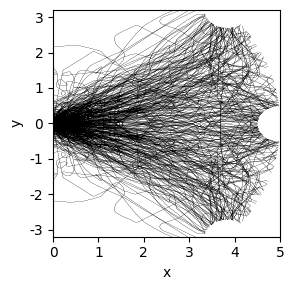

<IPython.core.display.Javascript object>

In [6]:
fig = []

fig, ax = mf.pb.plot(
    all_experiments.get((0, 2)).metaFish["x"][:, 0],
    all_experiments.get((0, 2)).metaFish["x"][:, 1],
    fig=fig,
    xlim=(0, 5),
    ylim=(-3.2, 3.2),
    figSize=(3, 3),
    markers=True,
    markerSize=1,
    alpha=0.01,
)
fig, ax = mf.pb.plot(
    all_experiments.get((0, 2)).metaFish["x"][:, 0],
    -all_experiments.get((0, 2)).metaFish["x"][:, 1],
    fig=fig,
    xlim=(0, 5),
    ylim=(-3.2, 3.2),
    figSize=(3, 3),
    markers=True,
    markerSize=1,
    alpha=0.01,
)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_yticklabels([-3, -2, -1, 0, 1, 2, 3])

mf.pb.plt.savefig(
    "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectory_"
    + str(nPosts)
    + ".png",
    format="png",
    dpi=300,
)

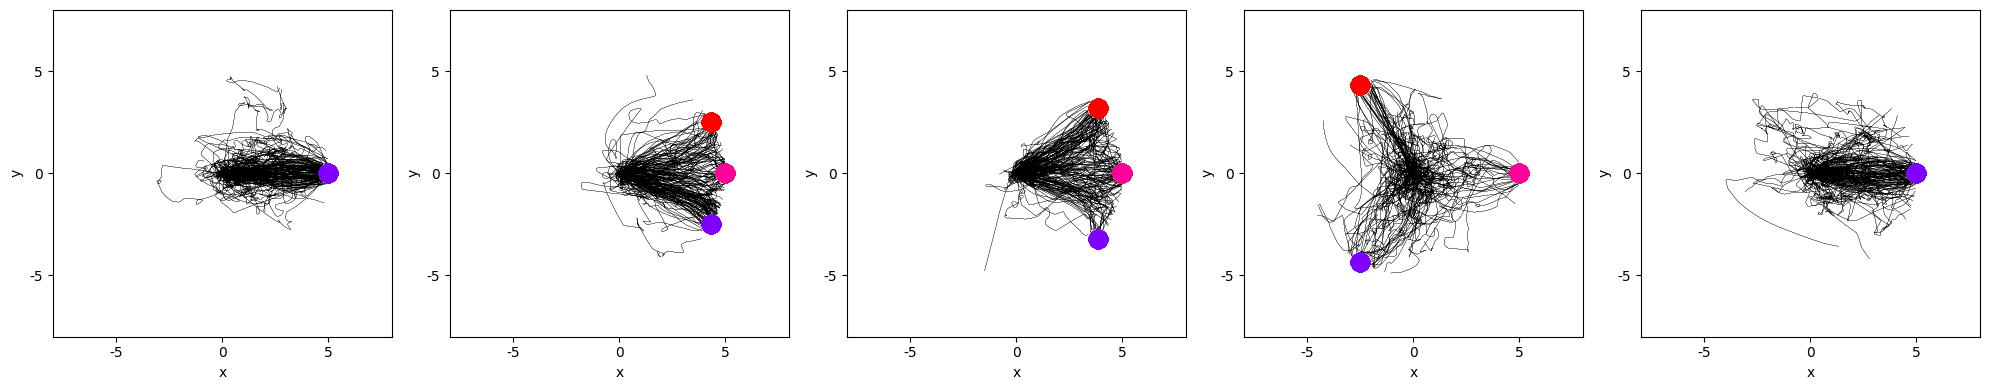

<IPython.core.display.Javascript object>

In [7]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab * y + (x + 1)
        fig, ax = mf.pb.plot(
            all_experiments.get((y, x)).metaFish["x"][:, 0],
            all_experiments.get((y, x)).metaFish["x"][:, 1],
            fig=fig,
            xTab=xTab,
            yTab=yTab,
            kTab=k,
            xlim=(-8, 8),
            ylim=(-8, 8),
            figSize=(4 * xTab, 4 * yTab),
            markers=True,
            markerSize=1,
            alpha=0.01,
        )
        fig, ax = mf.pb.plot(
            all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 0],
            all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 1],
            fig=fig,
            xTab=xTab,
            yTab=yTab,
            kTab=k,
            ax=ax,
            ids=0,
            markers=True,
            markerSize=14,
            hold=True,
        )
        if x != 0 and x != xTab - 1:
            fig, ax = mf.pb.plot(
                all_experiments.get((y, x, 0, 0, 2)).var["x"][:, 0],
                all_experiments.get((y, x, 0, 0, 2)).var["x"][:, 1],
                fig=fig,
                xTab=xTab,
                yTab=yTab,
                kTab=k,
                ax=ax,
                ids=1,
                markers=True,
                markerSize=14,
                hold=True,
            )
            if nPosts == 3:
                fig, ax = mf.pb.plot(
                    all_experiments.get((y, x, 0, 0, 3)).var["x"][:, 0],
                    all_experiments.get((y, x, 0, 0, 3)).var["x"][:, 1],
                    fig=fig,
                    xTab=xTab,
                    yTab=yTab,
                    kTab=k,
                    ax=ax,
                    ids=2,
                    markers=True,
                    markerSize=14,
                    hold=True,
                )

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectories_' + str(nPosts) + '.png', format='png', dpi=300)

findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


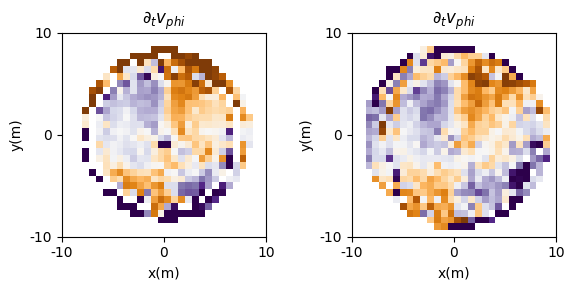

<IPython.core.display.Javascript object>

In [8]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(
    all_experiments.get((y, 0)).metaFish,
    all_experiments.get((y, 0)).metaFishRef,
    beats=False,
    lrPlot=False,
    fbPlot=False,
    rzPlot=False,
    noTitle=False,
    plotK=plotK,
    fig=fig,
    xTab=xTab,
    yTab=yTab,
    kTab=1,
)

fig = mf.plotter.FigureKatz(
    all_experiments.get((y, 4)).metaFish,
    all_experiments.get((y, 4)).metaFishRef,
    beats=False,
    lrPlot=False,
    fbPlot=False,
    rzPlot=False,
    noTitle=False,
    plotK=plotK,
    fig=fig,
    xTab=xTab,
    yTab=yTab,
    kTab=2,
)

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/controls_' + str(nPosts) + '.png', format='png', dpi=300)

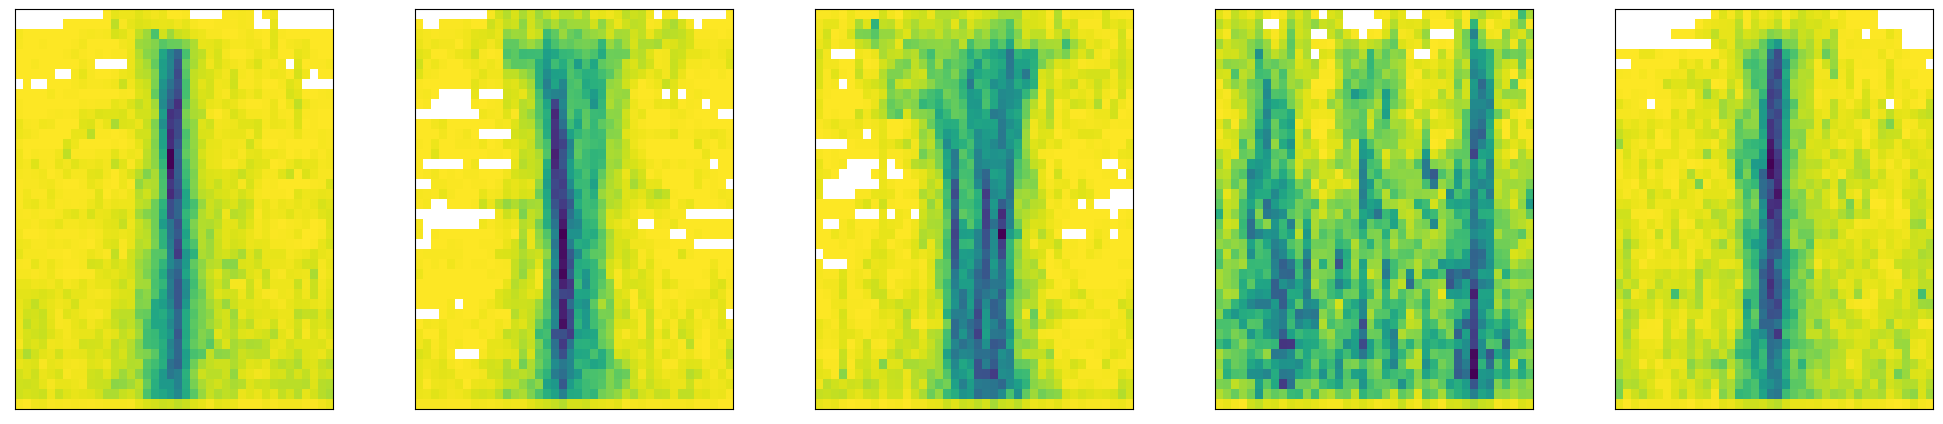

<IPython.core.display.Javascript object>

In [9]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab * y + (x + 1)
        idx = np.where(
            all_experiments.get((y, x)).metaFish["r"][:, 0] > 0.1
        )  # avoid bright spot at (0,0)
        fig = mf.pb.katzPlot(
            all_experiments.get((y, x)).metaFish["r"][idx, 0],
            all_experiments.get((y, x)).metaFish["vr"][idx, 1],
            fig=fig,
            xTab=xTab,
            yTab=yTab,
            kTab=k,
            xlim=(0, 5),
            ylim=(-np.pi, np.pi),
            figSize=(4 * xTab, 4 * yTab),
            noTicks=True,
            noSpace=True,
        )

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

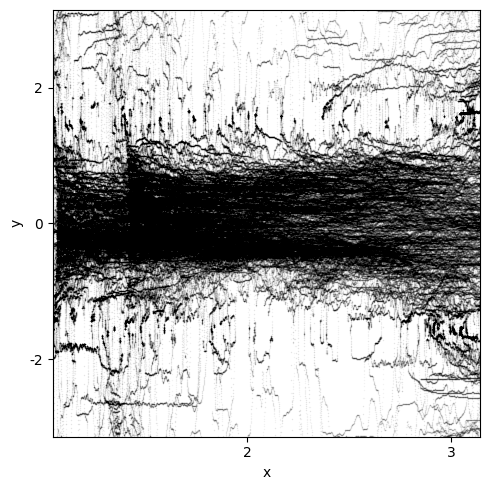

<IPython.core.display.Javascript object>

In [10]:
xTab = 5
y = 0
fig = []
ax = []
app_ang = []
direc = []

for x in range(1, xTab - 1):
    idx = np.where(
        all_experiments.get((y, x)).metaFish["r"][:, 0] > 0.1
    )  # avoid bright spot at (0,0)
    hold = False if ax == [] else True

    xs = np.squeeze(
        -2
        * np.arctan2(
            np.unique(all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 1])[0],
            np.unique(all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 0])[0]
            - all_experiments.get((y, x)).metaFish["x"][idx, 0],
        )
    )
    ys = np.squeeze(all_experiments.get((y, x)).metaFish["vr"][idx, 1])
    app_ang = xs if x == 1 else np.concatenate((app_ang, xs), axis=0)
    direc = ys if x == 1 else np.concatenate((direc, ys), axis=0)

    fig, ax = mf.pb.plot(
        xs,
        ys,
        fig=fig,
        ax=ax,
        xlim=(np.pi / 3, np.pi),
        markers=True,
        markerSize=1,
        alpha=0.05,
        hold=hold,
    )

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/dir_vs_apparent_ang' + str(nPosts) + '.png', format='png', dpi=300)

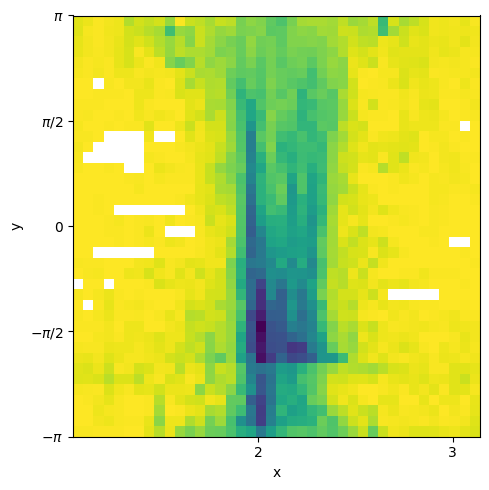

<IPython.core.display.Javascript object>

In [11]:
fig = mf.pb.katzPlot(
    app_ang, direc, xlim=(np.pi / 3, np.pi), ylim=(-np.pi, np.pi), aspect="auto"
)
# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_dir_vs_apparent_ang_' + str(nPosts) + '.png', format='png', dpi=300)

In [12]:
if nPosts == 2:
    xs = all_experiments.get((0, 1)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, 1)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, 1, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, 1, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, 1, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, 1, 0, 0, 2)).var["x"][:, 1])[0]

else:
    xs = all_experiments.get((0, 2)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, 2)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, 2, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, 2, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, 2, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, 2, 0, 0, 2)).var["x"][:, 1])[0]

    post2_x = np.unique(all_experiments.get((0, 2, 0, 0, 3)).var["x"][:, 0])[0]
    post2_y = np.unique(all_experiments.get((0, 2, 0, 0, 3)).var["x"][:, 1])[0]

    xs = np.concatenate((xs, xs))
    ys = np.concatenate((ys, -ys))

<IPython.core.display.Javascript object>

In [13]:
nbins = 500
peak_threshold = 0.95


def density_map(x, y, stats=True):
    if nPosts == 2:
        blur = (11, 11) if stats == True else (201, 201)
        r = [[0, post0_x], [post0_y, post1_y]]
    else:
        blur = (11, 11) if stats == True else (101, 101)
        r = [[0, post1_x], [post0_y, post2_y]]
    h, xedge, yedge, image = mf.pb.plt.hist2d(x, y, bins=nbins, normed=True, range=r)

    if nPosts == 2:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    else:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))

    for i in range(0, nbins):
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val

    return tmp_img

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  if sys.path[0] == '':


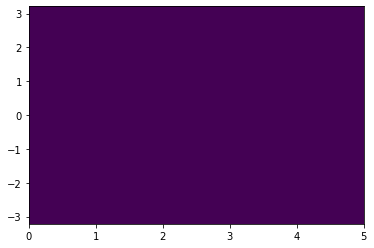

<IPython.core.display.Javascript object>

In [14]:
img = density_map(xs, ys, stats=False)

if nPosts == 2:
    x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y
else:
    x_peaks = np.where(img > peak_threshold)[1] * post1_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y

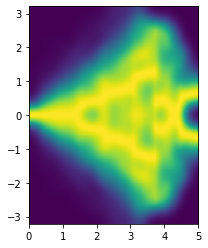

<IPython.core.display.Javascript object>

In [15]:
if nPosts == 2:
    mf.pb.plt.imshow(img, extent=[0, post0_x, post0_y, post1_y])
else:
    mf.pb.plt.imshow(img, extent=[0, post1_x, post0_y, post2_y])

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_tracks.png', format='png', dpi=300)

### Identify bifurcation point using a piecewise phase-transition function

#### Get first bifurcation point
Once you have this, you can draw a line segment bisecting the angle between the point and two targets. This will be the line about which you symmetrise to get the second bifurcation point

In [16]:
def fitfunc(x, p, q):
    if x < p:
        return 0
    else:
        return np.abs(x - p) ** q


def fitfunc_vec_self(x, p, q):
    y = np.zeros(x.shape)
    for i in range(len(y)):
        y[i] = fitfunc(x[i], p, q)
    return y

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  if sys.path[0] == '':
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


0
10
20
30
40
50
60
70
80
90


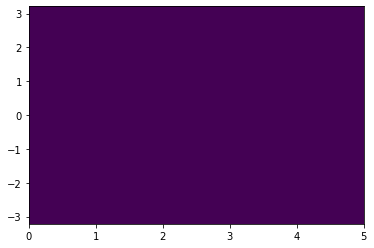

<IPython.core.display.Javascript object>

In [17]:
n_iters = 100
params1 = np.zeros((n_iters, 2))

if nPosts == 2:
    for i in range(n_iters):
        x_fit = []
        y_fit = []

        indices = np.random.choice(len(xs), size=10000, replace=True)
        x_sub = np.concatenate((xs[indices], xs[indices]))
        y_sub = np.concatenate((ys[indices], -ys[indices]))

        tmp_img = density_map(x_sub, y_sub, stats=True)
        x_fit = np.where(tmp_img > peak_threshold)[1] * post0_x / nbins
        y_fit = (
            np.where(tmp_img > peak_threshold)[0] * (post0_y - post1_y) / nbins
            + post1_y
        )

        x_fit = x_fit
        y_fit = np.abs(y_fit)

        fit_params, pcov = curve_fit(
            fitfunc_vec_self, x_fit, y_fit, p0=[3, 1], maxfev=10000
        )
        params1[i, :] = fit_params

        if i % 10 == 0:
            print(i)
else:
    xs1 = xs[np.where(xs < 3.0)[0]]
    ys1 = ys[np.where(xs < 3.0)[0]]

    for i in range(n_iters):
        x_fit = []
        y_fit = []

        indices = np.random.choice(len(xs1), size=10000, replace=True)
        x_sub = np.concatenate((xs1[indices], xs1[indices]))
        y_sub = np.concatenate((ys1[indices], -ys1[indices]))

        tmp_img = density_map(x_sub, y_sub, stats=True)
        x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
        y_fit = (
            np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins
            + post2_y
        )

        x_fit = x_fit
        y_fit = np.abs(y_fit)

        fit_params, pcov = curve_fit(
            fitfunc_vec_self, x_fit, y_fit, p0=[1, 1], maxfev=10000
        )
        params1[i, :] = fit_params

        if i % 10 == 0:
            print(i)

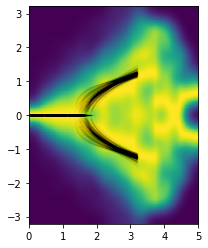

<IPython.core.display.Javascript object>

In [18]:
if nPosts == 2:
    mf.pb.plt.imshow(img, extent=[0, post0_x, post0_y, post1_y])
else:
    mf.pb.plt.imshow(img, extent=[0, post1_x, post0_y, post2_y])

for i in range(n_iters):
    parameters = params1[i]
    step_len = 0.01

    x1 = np.arange(step_len, parameters[0], step_len)
    y1 = np.zeros(len(x1))

    x = (
        np.arange(parameters[0], post0_x, step_len)
        if nPosts == 2
        else np.arange(parameters[0], 3.2, step_len)
    )
    x2 = np.concatenate((x, x))
    y2 = np.concatenate(
        ((x - parameters[0]) ** parameters[1], -(x - parameters[0]) ** parameters[1])
    )

    if nPosts != 2:
        bisector_xs = [np.median(params1, axis=0)[0], post2_x]
        bisector_ys = [
            0,
            np.tan(np.arctan2(post2_y, post2_x - np.min(params1, axis=0)[0]) / 2)
            * (post2_x - np.min(params1, axis=0)[0]),
        ]

    mf.pb.plt.scatter(x1, y1, c="black", s=1, alpha=0.01)
    mf.pb.plt.scatter(x2, y2, c="black", s=1, alpha=0.01)

In [19]:
if nPosts == 2:
    print(
        "The bifurcation occurs at an angle",
        2 * np.arctan2(post1_y, post1_x - np.median(params1, axis=0)[0]) * 180 / np.pi,
    )
else:
    print(
        "The first bifurcation occurs at an angle",
        2 * np.arctan2(post2_y, post2_x - np.median(params1, axis=0)[0]) * 180 / np.pi,
    )

The first bifurcation occurs at an angle 111.37966729643503


<IPython.core.display.Javascript object>

#### Get the second bifurcation point
For this, you must center the trajectories about the bifurcation point, get a new heatmap and rotate this by the angle of the bisector line

In [20]:
# center points about the first bifurcation
cxs = xs - np.median(params1, axis=0)[0]
cys = ys

cpost0_x = post0_x - np.median(params1, axis=0)[0]
cpost1_x = post1_x - np.median(params1, axis=0)[0]
cpost2_x = post2_x - np.median(params1, axis=0)[0]

<IPython.core.display.Javascript object>

In [21]:
@numba.njit(fastmath=True, parallel=True)
def parallel_rotate(xy, rmat):
    out = np.zeros(xy.shape)
    for idx in numba.prange(xy.shape[0]):
        out[idx] = np.dot(rmat[idx], xy[idx])
    return out

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


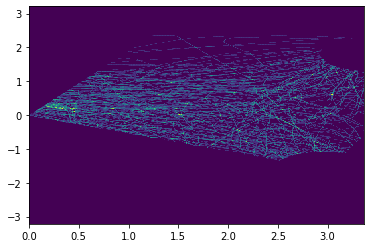

<IPython.core.display.Javascript object>

In [22]:
# clip all points to the left of and below 0 and points beyond post centers
ccxs = cxs[
    np.where(cxs > 0)[0]
]  # | (cys > 0) | (cxs > cpost1_x) | (cys < post0_y) | (cys > post2_y))[0]]
ccys = cys[np.where(cxs > 0)[0]]
ccxs = ccxs[np.where(ccys > 0)[0]]
ccys = ccys[np.where(ccys > 0)[0]]

# idxs = np.where((txs > 0) & (txs < post1_x) & (tys > post0_y) & (tys < post2_y))[0]
# txs = txs[idxs]
# tys = tys[idxs]

# cpost0 = np.array([cpost0_x,post0_y]).reshape(-1,2)
# cpost1 = np.array([cpost1_x,post1_y]).reshape(-1,2)
# cpost2 = np.array([cpost2_x,post2_y]).reshape(-1,2)

xy = np.concatenate((ccxs.reshape(-1, 1), ccys.reshape(-1, 1)), axis=1)
angle = np.full(
    ccxs.shape, np.arctan2(post2_y, post2_x - np.median(params1, axis=0)[0]) / 2
)
rmat = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]).T
rx, ry = parallel_rotate(xy, rmat).T

# bry = np.abs(ry)
# xy = np.concatenate((rx.reshape(-1,1),bry.reshape(-1,1)), axis=1)
# angle = np.full(rx.shape, -np.arctan2(post2_y,post2_x-np.median(params1, axis=0)[0])/2)
# rmat = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]).T
# brx, bry = parallel_rotate(xy, rmat).T

# cposts = np.concatenate((cpost1, cpost2))
# angle2 = np.full((cposts.shape[0],), np.arctan2(post2_y,post2_x-np.median(params, axis=0)[0])/2)
# rmat2 = np.array([[np.cos(angle2), -np.sin(angle2)], [np.sin(angle2), np.cos(angle2)]]).T
# rpostsx, rpostsy = parallel_rotate(cposts, rmat2).T

blur = (101, 101)

r1 = [[0, post1_x], [post0_y, post2_y]]
r2 = [
    [-np.median(params1, axis=0)[0], post1_x - np.median(params1, axis=0)[0]],
    [post0_y, post2_y],
]
r3 = [[0, post1_x - np.median(params1, axis=0)[0]], [post0_y, post2_y]]

h1, xedge, yedge, image = mf.pb.plt.hist2d(xs, ys, bins=nbins, normed=True, range=r1)
h2, xedge, yedge, image = mf.pb.plt.hist2d(cxs, cys, bins=nbins, normed=True, range=r2)
h3, xedge, yedge, image = mf.pb.plt.hist2d(
    ccxs, ccys, bins=nbins, normed=True, range=r3
)
h4, xedge, yedge, image = mf.pb.plt.hist2d(rx, ry, bins=nbins, normed=True, range=r3)

tmp_img1 = np.flipud(np.rot90(cv2.GaussianBlur(h1, blur, 0)))
tmp_img2 = np.flipud(np.rot90(cv2.GaussianBlur(h2, blur, 0)))
tmp_img3 = np.flipud(np.rot90(cv2.GaussianBlur(h3, blur, 0)))
tmp_img4 = np.flipud(np.rot90(cv2.GaussianBlur(h4, blur, 0)))

for i in range(0, nbins):
    max_val = np.max(tmp_img1[:, i])
    tmp_img1[:, i] = tmp_img1[:, i] / max_val
    max_val = np.max(tmp_img2[:, i])
    tmp_img2[:, i] = tmp_img2[:, i] / max_val
    max_val = np.max(tmp_img3[:, i])
    tmp_img3[:, i] = tmp_img3[:, i] / max_val
    max_val = np.max(tmp_img4[:, i])
    tmp_img4[:, i] = tmp_img4[:, i] / max_val

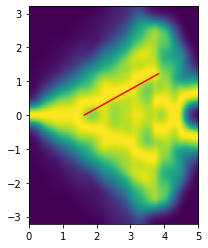

<IPython.core.display.Javascript object>

In [23]:
mf.pb.plt.imshow(tmp_img1, extent=[r1[0][0], r1[0][1], r1[1][0], r1[1][1]])
mf.pb.plt.plot(bisector_xs, bisector_ys, c="red")

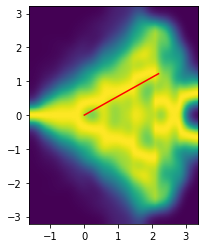

<IPython.core.display.Javascript object>

In [24]:
mf.pb.plt.imshow(tmp_img2, extent=[r2[0][0], r2[0][1], r2[1][0], r2[1][1]])
mf.pb.plt.plot(bisector_xs - np.median(params1, axis=0)[0], bisector_ys, c="red")

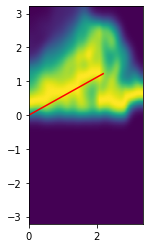

<IPython.core.display.Javascript object>

In [25]:
mf.pb.plt.imshow(np.flipud(tmp_img3), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])
mf.pb.plt.plot(bisector_xs - np.median(params1, axis=0)[0], bisector_ys, c="red")

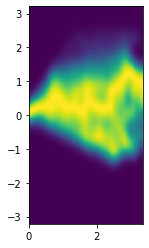

<IPython.core.display.Javascript object>

In [26]:
mf.pb.plt.imshow(np.flipud(tmp_img4), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  if sys.path[0] == '':
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


0
10
20
30
40
50
60
70
80
90


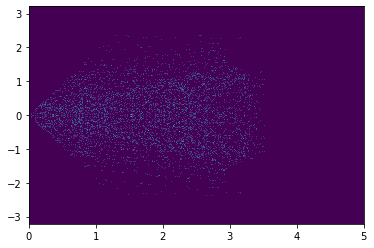

<IPython.core.display.Javascript object>

In [27]:
params2 = np.zeros((n_iters, 2))

for i in range(n_iters):
    x_fit = []
    y_fit = []

    indices = np.random.choice(len(rx), size=10000, replace=True)
    x_sub = np.concatenate((rx[indices], rx[indices]))
    y_sub = np.concatenate((ry[indices], -ry[indices]))

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)

    fit_params, pcov = curve_fit(
        fitfunc_vec_self, x_fit, y_fit, p0=[1, 1], maxfev=10000
    )
    params2[i, :] = fit_params

    if i % 10 == 0:
        print(i)

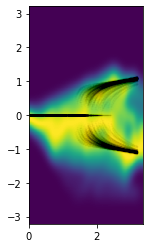

<IPython.core.display.Javascript object>

In [28]:
mf.pb.plt.imshow(tmp_img4, extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])

for i in range(n_iters):
    parameters = params2[i]
    step_len = 0.01

    x1 = np.arange(step_len, parameters[0], step_len)
    y1 = np.zeros(len(x1))

    x = (
        np.arange(parameters[0], post0_x, step_len)
        if nPosts == 2
        else np.arange(parameters[0], 3.2, step_len)
    )
    x2 = np.concatenate((x, x))
    y2 = np.concatenate(
        ((x - parameters[0]) ** parameters[1], -(x - parameters[0]) ** parameters[1])
    )

    mf.pb.plt.scatter(x1, y1, c="black", s=1, alpha=0.01)
    mf.pb.plt.scatter(x2, y2, c="black", s=1, alpha=0.01)
    # mf.pb.plt.vlines(np.median(params1, axis=0)[0], ymin=post0_y, ymax=post2_y, color='white', linestyles='dashed')

In [29]:
bif2 = np.array([np.median(params2, axis=0)[0], 0]).reshape(1, -1)
ang = angle[0]
rmat1 = np.array([[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]]).T
bif2 = parallel_rotate(bif2, rmat).T
bif2[0] += np.median(params1, axis=0)[0]

<IPython.core.display.Javascript object>

In [30]:
print(
    "The second bifurcation occurs at angle",
    (
        (
            np.arctan2(post2_y - bif2[1], post2_x - bif2[0])
            - np.arctan2(bif2[1] - post1_y, post1_x - bif2[0])
        )
        * 180
        / np.pi
    )[0],
)

The second bifurcation occurs at angle 104.64907676098679


<IPython.core.display.Javascript object>

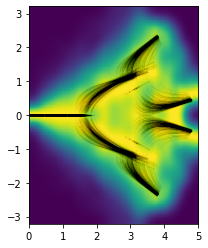

<IPython.core.display.Javascript object>

In [31]:
mf.pb.plt.imshow(img, extent=[0, post1_x, post0_y, post2_y])

for i in range(n_iters):
    parameters = params2[i]
    step_len = 0.01

    x1 = np.arange(step_len, parameters[0], step_len)
    y1 = np.zeros(len(x1))
    bcxy1 = np.concatenate((x1.reshape(-1, 1), y1.reshape(-1, 1)), axis=1)
    ang1 = np.full(
        x1.shape, -np.arctan2(post2_y, post2_x - np.median(params1, axis=0)[0]) / 2
    )
    rmat1 = np.array([[np.cos(ang1), -np.sin(ang1)], [np.sin(ang1), np.cos(ang1)]]).T
    bcx1, bcy1 = parallel_rotate(bcxy1, rmat1).T
    bx1 = bcx1 + np.median(params1, axis=0)[0]

    x = (
        np.arange(parameters[0], post0_x, step_len)
        if nPosts == 2
        else np.arange(parameters[0], 3.0, step_len)
    )
    x2 = np.concatenate((x, x))
    y2 = np.concatenate(
        ((x - parameters[0]) ** parameters[1], -(x - parameters[0]) ** parameters[1])
    )
    bcxy2 = np.concatenate((x2.reshape(-1, 1), y2.reshape(-1, 1)), axis=1)
    ang2 = np.full(
        x2.shape, -np.arctan2(post2_y, post2_x - np.median(params1, axis=0)[0]) / 2
    )
    rmat2 = np.array([[np.cos(ang2), -np.sin(ang2)], [np.sin(ang2), np.cos(ang2)]]).T
    bcx2, bcy2 = parallel_rotate(bcxy2, rmat2).T
    bx2 = bcx2 + np.median(params1, axis=0)[0]

    bx2 = np.concatenate((bx2, bx2))
    bcy2 = np.concatenate((bcy2, -bcy2))

    # mf.pb.plt.scatter(bx1,bcy1, c='black', s=1, alpha=0.01)
    mf.pb.plt.scatter(bx2, bcy2, c="black", s=1, alpha=0.01)

    parameters = params1[i]
    step_len = 0.01

    x1 = np.arange(step_len, parameters[0], step_len)
    y1 = np.zeros(len(x1))

    x = (
        np.arange(parameters[0], post0_x, step_len)
        if nPosts == 2
        else np.arange(parameters[0], np.max(bx1), step_len)
    )
    x2 = np.concatenate((x, x))
    y2 = np.concatenate(
        ((x - parameters[0]) ** parameters[1], -(x - parameters[0]) ** parameters[1])
    )

    mf.pb.plt.scatter(x1, y1, c="black", s=1, alpha=0.01)
    mf.pb.plt.scatter(x2, y2, c="black", s=1, alpha=0.01)